# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [51]:
df = pd.read_csv('../data/states_edu.csv') ##
df.head
## df.columns


<bound method NDFrame.head of              PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [52]:
df.isna().sum() ## How many NA are in each row
## Renaming the scores by grade
df.rename({
    'AVG_READING_8_SCORE':'READING_SCORE_8',
    'AVG_READING_4_SCORE':'READING_SCORE_4',
    'AVG_MATH_8_SCORE':'MATH_SCORE_8',
    'AVG_MATH_4_SCORE':'MATH_SCORE_4'
    },
    axis=1,inplace=True)
## Renaming the enrollment by grade
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

## Do all the enrollments add up to total enrollment (so we can fill in total enrollment NAs)
##(df["Grades_All_G"]-df["AVG_READING"]-df["ENROLL_KINDER"]-df["ENROLL_PRIMARY"]-df["ENROLL_HS"]).describe()
## Fill in missing NAs
##df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])





In [53]:
df.isna().sum() ## How many NA are in each row


PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
MATH_SCORE_4                    1150
MATH_SCORE_8                    1113
READING_SCORE_4                 1065
READING_SCORE_8                 1153
dtype: int64

In [54]:
df.count()

PRIMARY_KEY                     1715
STATE                           1715
YEAR                            1715
ENROLL_ALL_EST                  1224
TOTAL_REVENUE                   1275
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1275
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1224
CAPITAL_OUTLAY_EXPENDITURE      1275
ENROLL_PREK                     1542
ENROLL_KINDER                   1632
ENROLL_4                        1632
ENROLL_8                        1632
ENROLL_12                       1632
ENROLL_PRIMARY                  1020
ENROLL_HS                       1071
ENROLL_ALL                      1632
MATH_SCORE_4                     565
MATH_SCORE_8                     602
READING_SCORE_4                  650
READING_SCORE_8                  562
dtype: int64

In [55]:
## I'm going to analyze 4th grade reading score and see how it correlates with 
## Support Services Expenditure and Instruction expenditure to see the impact of 
## financial investment on 4th grade reading scores by state
df.dropna(subset=['READING_SCORE_4'], inplace=True)
df
##df.dropna(subset=['INSTRUCTION_EXPENDITURE'], inplace=True, how='any')


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,MATH_SCORE_4,MATH_SCORE_8,READING_SCORE_4,READING_SCORE_8
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *4th grade reading score*

How many years of data are logged in our dataset? 

In [56]:
newobject = df["YEAR"].unique()
newobject.tolist()
newobject.shape
## there are 33 years in the data set
## 

(14,)

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [57]:
dfByState = df.groupby('STATE')
Michigan = dfByState.get_group('MICHIGAN')['READING_SCORE_4'].mean()
Ohio = dfByState.get_group('OHIO')['READING_SCORE_4'].mean()
if Michigan > Ohio:
    print('Michigan')
elif Ohio > Michigan:
    print('Ohio')
else: print('equal')



Ohio


Find the average for your outcome score across all states in 2019

In [58]:
dfByYear = df.groupby('YEAR')
## I want to group by State
allState2019 = dfByYear.get_group(2019)['READING_SCORE_4'].mean()
allState2019

219.79245283018867

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [59]:
dfByState['READING_SCORE_4'].max()


STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [64]:
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE']/df['ENROLL_ALL']
## I Added two new columns. One looks at Instruction Expenditure per student and the other looks at the total state expenditure per student. 

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

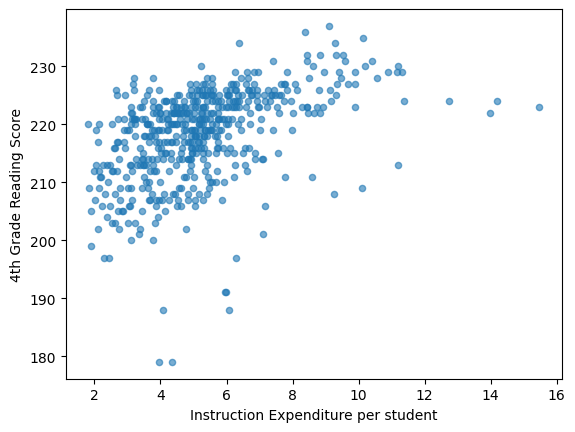

In [130]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='READING_SCORE_4', alpha=0.6)
plt.xlabel('Instruction Expenditure per student')
plt.ylabel('4th Grade Reading Score')

It appears that there is a mild correlation between 4th grade enrollment and 4th grade reading scores. 

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

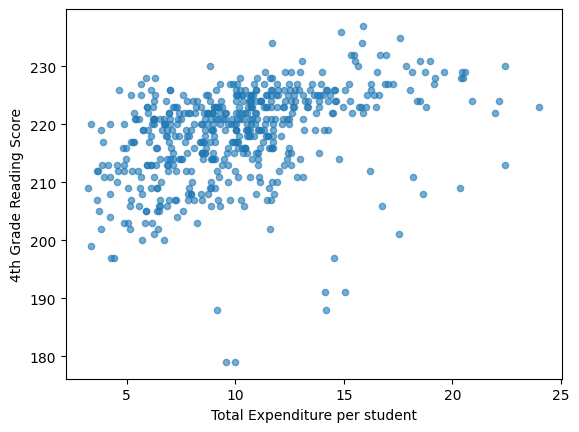

In [131]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='READING_SCORE_4', alpha=0.6)
plt.xlabel('Total Expenditure per student')
plt.ylabel('4th Grade Reading Score')

There appears to be a mild correlation between 4th grade reading score and total expenditure per student

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X = df[['TOTAL_EXPENDITURE_PER_STUDENT','INSTRUCTION_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['READING_SCORE_4']


In [134]:
y.fillna(y.mean(), inplace=True)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
# create your model here
# model = 
model = LinearRegression()

In [138]:
model.fit(X_train, y_train)

LinearRegression()

In [139]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [140]:
model.score(X_test, y_test)


0.25613777713486585

In [141]:
np.mean(model.predict(X_test)-y_test)

0.1333169590461538

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

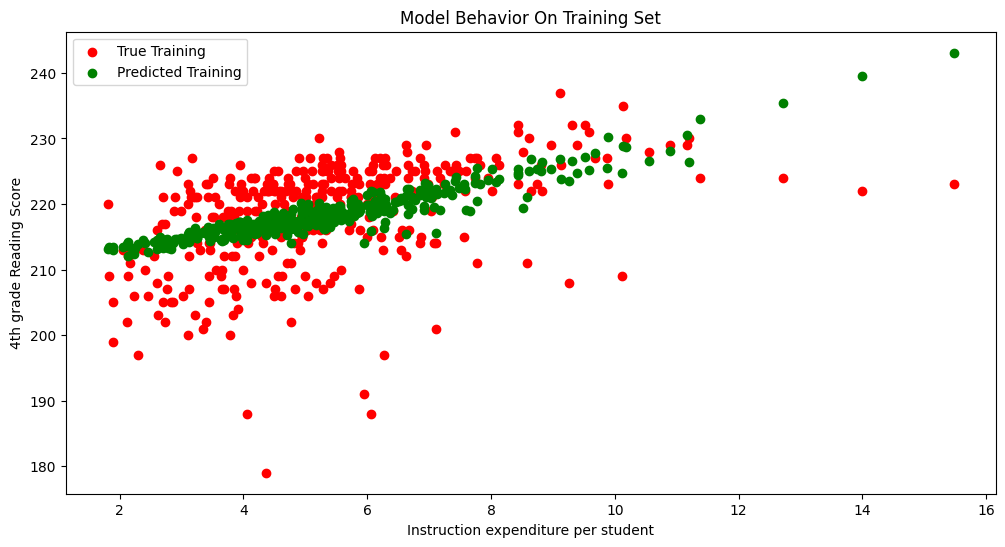

In [145]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel('Instruction expenditure per student')
plt.ylabel('4th grade Reading Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

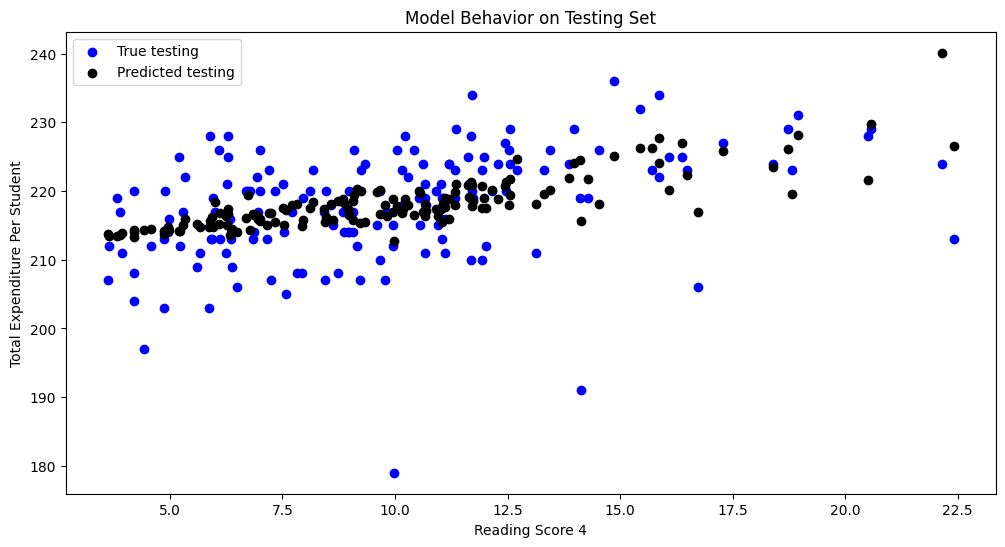

In [146]:
col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel('Reading Score 4')
plt.ylabel('Total Expenditure Per Student')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

My model appeared to have mixed results based on certain metrics. My mean error appeared decently low at 0.13, however, my model score was 0.25 which is quite poor and therefore likely not an accurate model. However, there appeared to be at best a mild correlation of my data in the first place, so my model's underperformance was to be expected. My correlation coefficient was likely not very high. 